# Tuning QLearning agent

1) During the first experiments and tests of our SARSA agent, it was not clear if glei strategy was more efficient than a basic epsilon greedy (strategy whre that we don't decay epsilon through training).  
Therefore, we will first study the differences between the glei and the normal strategies.  
**Results are interesting: they highlight the fact that glei strategy has no advantages (in terms of optimality and speed of convergence) for every epsilon above 0.2 and under 0.001.**  
**However, for epsilon of 0.005 & 0.01, glei strategy converges better and faster**

2) Then, the grid search highlights that the best set of parameter is:
    * Use GLEI strategy
    * starting epsilon: 0.005
    * alpha: 0.1
    * gamma: 1

# Libraries

In [1]:
import gymnasium as gym
import numpy as np
from agents.sarsa import Sarsa
from agents.qlearning import QLearning

from utils.encoding import mc_tile_encoding
from utils.utils_fct import plot_moving_averages, process_json
from utils.policy import epsilon_greedy_policy, softmax_policy

# Testing agent

In [3]:
env = gym.make("MountainCar-v0", render_mode=None)

qlearning_agent = QLearning(
    encode_fct=mc_tile_encoding,
    policy=softmax_policy,
    nb_actions=env.action_space.n,
)

_ = qlearning_agent.train(
    env=env,
    alpha=0.1,
    gamma=1,
    verbose=0,
    nb_episodes=1000,
    # use_glei=True,
    # epsilon=0.01,
)

_ = qlearning_agent.evaluate_policy(env=env, nb_episodes=10, verbose=1)  # , epsilon=0)

Episode 1: Total Reward = -156.0
Episode 2: Total Reward = -142.0
Episode 3: Total Reward = -142.0
Episode 4: Total Reward = -114.0
Episode 5: Total Reward = -89.0
Episode 6: Total Reward = -118.0
Episode 7: Total Reward = -165.0
Episode 8: Total Reward = -87.0
Episode 9: Total Reward = -99.0
Episode 10: Total Reward = -191.0
Average Total Reward over 10 episodes: -130.3


# $\epsilon$-Greedy QLearning

In [2]:
env = gym.make("MountainCar-v0", render_mode=None)

eps_greedy_qlearning = QLearning(
    encode_fct=mc_tile_encoding,
    policy=epsilon_greedy_policy,
    nb_actions=env.action_space.n,
)

## 1. Studying the Impact of GLEI Strategy on $\epsilon$-Greedy Policy

In [3]:
glei_tune_historic = eps_greedy_qlearning.grid_search(
    env=env,
    nb_episodes=1000,
    nb_iter=10,
    use_glei=True,
    verbose=False,
    alpha=[0.1],
    gamma=[0.99],
    epsilon=[0.005, 0.01, 0.1],
)

no_glei_tune_historic = eps_greedy_qlearning.grid_search(
    env=env,
    nb_episodes=1000,
    nb_iter=10,
    use_glei=False,
    verbose=False,
    alpha=[0.1],
    gamma=[0.99],
    epsilon=[0.005, 0.01, 0.1],
)

data_dict = {**no_glei_tune_historic, **glei_tune_historic}
process_json("./data/qlearning/eps_greedy/glei_vs_noglei", "w", data_dict=data_dict)

/Users/pneveu/Library/Caches/pypoetry/virtualenvs/mountain-car-dUPDKyLO-py3.10/lib/python3.10/site-packages/numpy/_core/_methods.py:194: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/pneveu/Library/Caches/pypoetry/virtualenvs/mountain-car-dUPDKyLO-py3.10/lib/python3.10/site-packages/numpy/_core/_methods.py:205: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Dictionary saved to ./data/qlearning/eps_greedy/glei_vs_noglei


/Users/pneveu/Library/Caches/pypoetry/virtualenvs/mountain-car-dUPDKyLO-py3.10/lib/python3.10/site-packages/numpy/_core/_methods.py:194: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


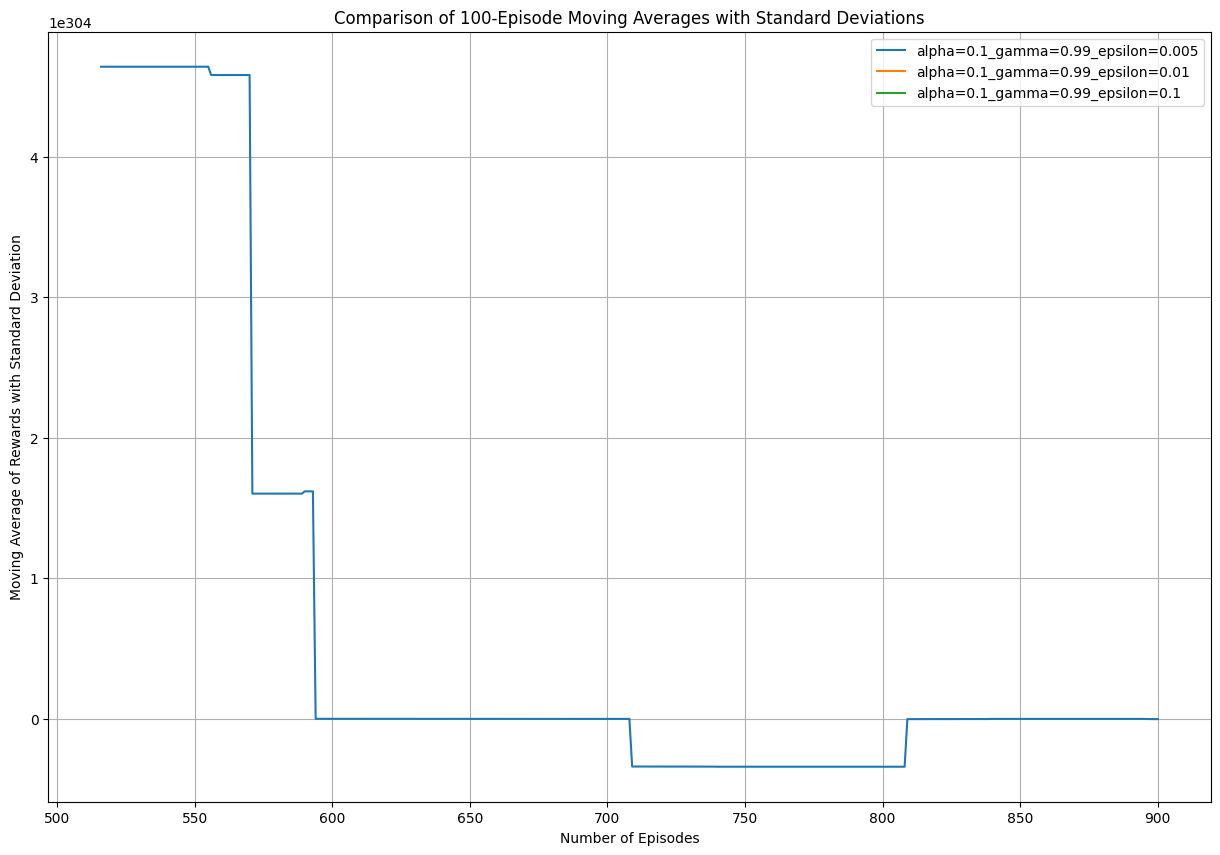

In [4]:
plot_moving_averages(
    process_json("./data/qlearning/eps_greedy/glei_vs_noglei", "r"),
    nb_episodes=1000,
    window_size=100,
)

## 2. Searching best $\alpha$ and $\gamma$

In [5]:
alpha_gamma_tune_historic = eps_greedy_qlearning.grid_search(
    env=env,
    nb_episodes=1000,
    nb_iter=10,
    use_glei=False,
    verbose=False,
    alpha=[0.005, 0.01, 0.05],
    gamma=[0.9, 0.99, 1],
    epsilon=[0.005],
)
process_json(
    "./data/qlearning/eps_greedy/alpha_gamma_search_epsilon=0.005_glei=true_3",
    "w",
    data_dict=alpha_gamma_tune_historic,
)

/Users/pneveu/Library/Caches/pypoetry/virtualenvs/mountain-car-dUPDKyLO-py3.10/lib/python3.10/site-packages/numpy/_core/_methods.py:205: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


KeyboardInterrupt: 

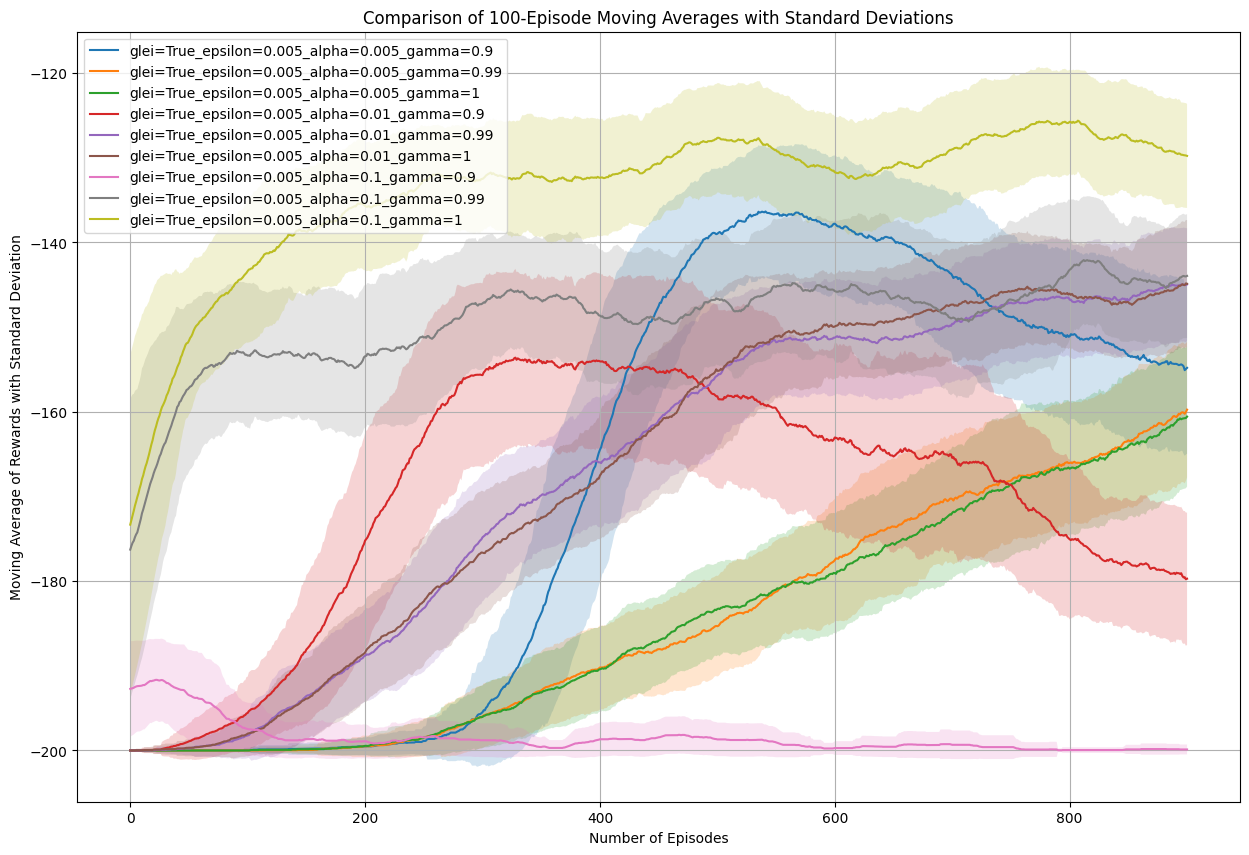

In [7]:
plot_moving_averages(
    process_json(
        "./data/qlearning/eps_greedy/alpha_gamma_search_epsilon=0.005_glei=true_3", "r"
    ),
    nb_episodes=1000,
    window_size=100,
)

# Softmax QLearning

In [ ]:
env = gym.make("MountainCar-v0", render_mode=None)

softmax_qlearning = QLearning(
    encode_fct=mc_tile_encoding,
    policy=softmax_policy,
    nb_actions=env.action_space.n,
)

## 1. Searching best $\alpha$

In [ ]:
alpha_gamma_tune_historic = softmax_qlearning.grid_search(
    env=env,
    nb_episodes=1000,
    nb_iter=10,
    verbose=False,
    alpha=[0.005, 0.01, 0.05, 0.1],
    gamma=[1],
)
process_json(
    "./data/qlearning/softmax/alpha_search",
    "w",
    data_dict=alpha_gamma_tune_historic,
)

In [ ]:
plot_moving_averages(
    process_json("./data/qlearning/softmax/alpha_search", "r"),
    nb_episodes=1000,
    window_size=100,
)